# PyTorch Computer vision


## 0. Computer vision libraries in PyTorch

* `torchvision` - base domain library for PyTorch computer vision
* `torchvision.datasets` - gets datasets and data loading functions for computer vision here
* `torchvision.models` - get pretrained computer vision that you can leverage for your own problems
* `torchvision.transforms` -  functions for manipulating your vision data (images) to be suitable for use with an ML Model
* `torch.utils.data.Dataset` - base dataset class for PyTorch
* `torch.utils.data.DataLoader` - creates a python iterable over a dataset

In [250]:
# import pytorch
import torch
from torch import nn

# import torchvision
import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

# import matplotlib
import matplotlib.pyplot as plt

# check versions
print(torch.__version__)
print(torchvision.__version__)


2.1.2+cpu
0.16.2+cpu


## 1. Getting a dataset

The dataset we'll be using is FashionMNIST from torchvision.datasets

In [251]:
# setup training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root = "data", # where to download data to?
    train = True, # do we want the training dataset?
    download = True, # do we want to download yes/no?
    transform = torchvision.transforms.ToTensor(), # how do we want to transform the data?
    target_transform = None # how do we want to transform the labels/targets?
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = torchvision.transforms.ToTensor(),
    target_transform = None
)

In [252]:
len(train_data) , len(test_data)

(60000, 10000)

In [253]:
# see the first train example
image, label = train_data[0]
image,label



(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [254]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [255]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [256]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [257]:
# check the shape of the first image
image.shape,label

(torch.Size([1, 28, 28]), 9)

### 1.2 visualizing our data


Image shape: torch.Size([1, 28, 28])


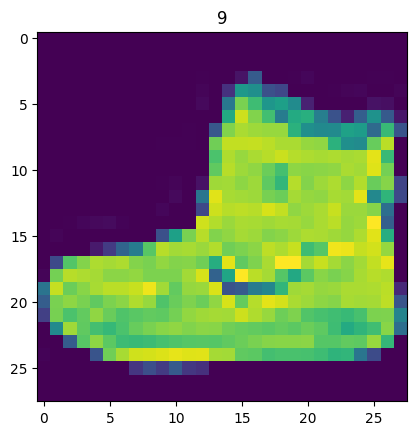

In [258]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label);


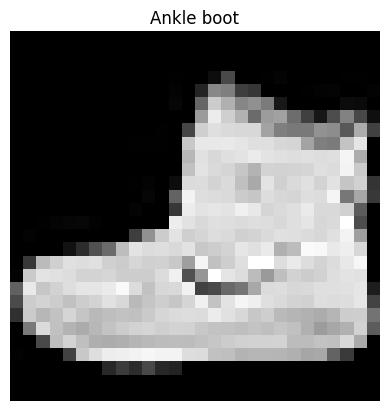

In [259]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(f"{class_names[label]}");
plt.axis(False);

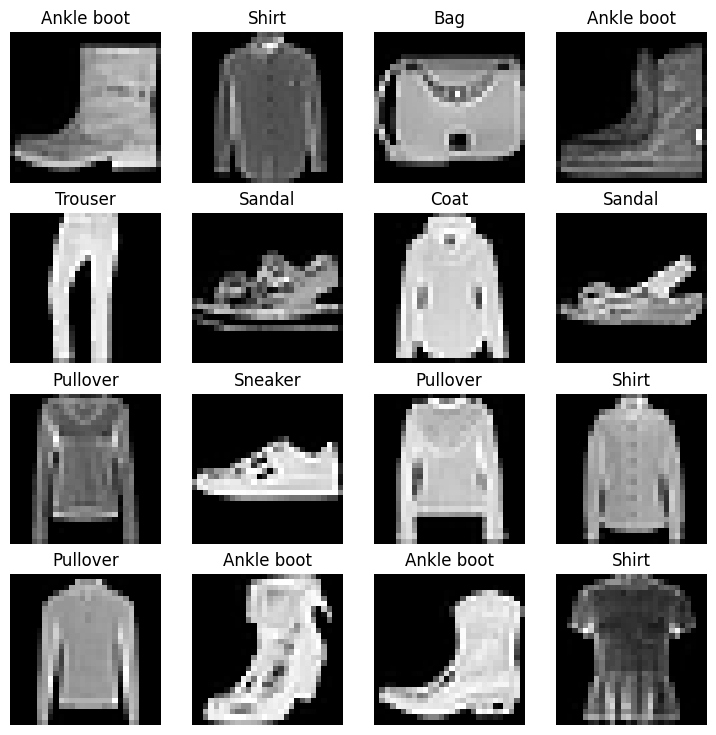

In [260]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1,rows*cols+1):
  random_idx = torch.randint(0,len(train_data),size=(1,)).item()
  image, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(image.squeeze(), cmap="gray")
  plt.title(f"{class_names[label]}")
  plt.axis(False)

Do you think these items of clothing (images) could be modelled with pure linear lines? or do you think we'll need to non-linearities?


In [261]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 2. Prepare DataLoader

Right now, our data is in the form of PyTorch Datasets.

DataLoader turns dataset into a python iterable.

More specifically, we want to turn our data into batches (or mini-batches).

Why would we do this?

1. It is more computationally efficient, as in, your computing hardware may not be able to look (store in memory) at 6000 images in one hit. So we break it down to 32 images at a time (bacth size of 32).
2. It gives our neural network more chances to update its gradients per epoch.

In [262]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data,
                               batch_size=BATCH_SIZE,
                                 shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                                shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x1e69d298b10>,
 <torch.utils.data.dataloader.DataLoader at 0x1e684ac1c10>)

In [263]:
# Let's check out what we've created
print(f"DataLoader: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of size {BATCH_SIZE}")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of size {BATCH_SIZE}")

DataLoader: (<torch.utils.data.dataloader.DataLoader object at 0x000001E69D298B10>, <torch.utils.data.dataloader.DataLoader object at 0x000001E684AC1C10>)
Length of train_dataloader: 1875 batches of size 32
Length of test_dataloader: 313 batches of size 32


In [264]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size : torch.Size([1, 28, 28])
Label size : torch.Size([])


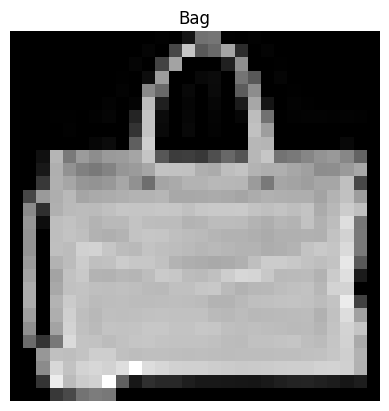

In [265]:
# Show a sample
#torch.manual_seed(42)
random_idx = torch.randint(0,len(train_features_batch),size=[1]).item()
image, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False);
print(f"Image size : {image.shape}")
print(f"Label size : {label.shape}")


## 3. Model 0: Build a baseline model

When starting to build a series of machine learning modelling experiments, it's best practice to start with a baseline model.

A baseline model is a simple model you will try and improve upon with subsequent models/experiments

In other words: start simply and add complexity when necessary.

In [266]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
X = train_features_batch[0]

# Apply the flatten layer
output = flatten_model(X)

# print out what happened
print(f"Shape before flattening: {X.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [Color_channels, height * width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [Color_channels, height * width]


In [267]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
        input_shape: int,
        hidden_units: int,
        output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape)

        )

    def forward(self, x):
      return self.layer_stack(x)
    
  

In [268]:
torch.manual_seed(42)
model_0 = FashionMNISTModelV0(input_shape=28*28, #this is 784
                            hidden_units=10,
                            output_shape=len(class_names)).to("cpu")
model_0


FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [269]:
dummy_x=torch.rand([1, 1, 28, 28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [270]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1 Setup loss, optimizer and evaluation metrics

* Loss function - since we're working with multi-class data, out loss function will be `nn.CrossEntropyLoss()`
* Optimizer - our optimizer `torch.optim.SGD()` (stochastic gradient descent)
* Evaluation metric - since we're working on a classification problem, let's use accuracy as our evaluation metric

In [271]:
import requests
from pathlib import Path


In [272]:
# Import accuracy metric
from helper_functions import accuracy_fn

# setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

### 3.2 Creating a function to time our experiments

Machine learning is very experimental.

Two of the main things you'll often want to track are:
1. Model's performance (loss and accuracy values etc)
2. How fast it runs 

In [273]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  """prints difference between start and end time."""
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [274]:
start_time = timer()
# some code...
end_time = timer()
print_train_time(start=start_time, end=end_time, device="CPU")

Train time on CPU: 0.000 seconds


8.349999552592635e-05

### 3.3 Creating a training loop and training a model on batches of data

1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss *per batach*.
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*.
4. Print out what's happening.
5. Time it all (for fun).


In [275]:
# import tqdm for progress bar
from tqdm.auto import tqdm

# set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# set the number of epochs (we'll keep this small for faster training)
epochs = 3

# create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----")
  ### TRAINING LOOP
  train_loss = 0
  # add a loop through the training batches
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()
    # forward pass
    y_pred = model_0(X)

    # calculate loss
    loss = loss_fn(y_pred, y)
    train_loss += loss # add the loss to the running loss

    # optimizer zero grad
    optimizer.zero_grad()

    # backward pass
    loss.backward()

    # optimizer step
    optimizer.step()

    # print out whats happening 
    if batch % 400 == 0:
      print(f"Looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples")

  # Divide total train loss by length of train dataloader
  train_loss/=len(train_dataloader)

  ### TEST LOOP
  test_loss, test_acc = 0,0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # forward pass
      test_pred = model_0(X_test)

      # calculate loss
      test_loss += loss_fn(test_pred, y_test)

      # calculate accuracy
      test_acc += accuracy_fn(y_true = y_test, y_pred = test_pred.argmax(dim=1)) 

    # calculate test loss average per batch
    test_loss /= len(test_dataloader)
    # calculate test accuracy average per batch
    test_acc /= len(test_dataloader)

  # print out whats happening
  print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")

# calculate total train time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start = train_time_start_on_cpu,
                                            end = train_time_end_on_cpu,
                                            device = str(next(model_0.parameters())))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Looked at 0/60000 samples


Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 33%|███▎      | 1/3 [00:28<00:57, 28.94s/it]


Train loss: 0.5904 | Test loss: 0.5095, Test acc: 82.0387
Epoch: 1
-----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 67%|██████▋   | 2/3 [00:59<00:29, 29.89s/it]


Train loss: 0.4763 | Test loss: 0.4799, Test acc: 83.1969
Epoch: 2
-----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


100%|██████████| 3/3 [01:29<00:00, 29.93s/it]


Train loss: 0.4550 | Test loss: 0.4766, Test acc: 83.4265
Train time on Parameter containing:
tensor([[ 0.0273,  0.0298, -0.0065,  ...,  0.0071,  0.0091,  0.0170],
        [-0.0189, -0.0355,  0.0155,  ...,  0.0161,  0.0120,  0.0117],
        [-0.0008,  0.0020,  0.0032,  ...,  0.0058, -0.0146,  0.0084],
        ...,
        [-0.0116,  0.0274, -0.0323,  ...,  0.0527,  0.0434,  0.0006],
        [-0.0231,  0.0252,  0.0236,  ..., -0.0892, -0.0385, -0.0071],
        [ 0.0175, -0.0148,  0.0027,  ..., -0.1155, -0.0674,  0.0125]],
       requires_grad=True): 89.797 seconds


### 4. Make predictions and get Model_0 results

In [276]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """ Returns a dictionary containing the results of model predicting on data_loader."""
  loss, acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # forward pass
      y_pred = model(X)

      # calculate loss
      loss += loss_fn(y_pred, y)

      # calculate accuracy
      acc += accuracy_fn(y_true = y, y_pred = y_pred.argmax(dim=1))

    # calculate loss average per batch
    loss /= len(data_loader)
    # calculate accuracy average per batch
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": acc}


# calculate model 0 results on test dataset
model_0_results = eval_model(model = model_0,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn)

model_0_results

  3%|▎         | 9/313 [00:00<00:07, 40.83it/s]

100%|██████████| 313/313 [00:03<00:00, 81.66it/s]


{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

### 5. setup some device agnostic-code ( for using GPU if there is one )

In [277]:
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## 6. Model 1: Building a better model with non-linearity



In [278]:
# Create a model with linear and non-linear layers
class FashionMNISTModelV1(nn.Module):
    def __init__(self,
        input_shape: int,
        hidden_units: int,
        output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # flatten inputs into a single vector
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape),
            nn.ReLU()

        )

    def forward(self, x: torch.Tensor):
      return self.layer_stack(x)

In [279]:
# Create a instance of model_1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=28*28,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

next(model_1.parameters()).device

device(type='cpu')

In [280]:
next(model_0.parameters()).device

device(type='cpu')

### 6.1 setup loss,optimizer and evaluation metrics


In [281]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss() # measure how wrong our model is
optimizer = torch.optim.SGD(params=model_1.parameters(), # tries to update our model's parameters to reduce the loss
                            lr=0.1)



### 6.2 Functionizing training and evaluation/testing loops

Let's create a function for :
* training loop - `train_setp()`
* Testing loop - `test_step()`

In [282]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device
               ):
  """ performs a training with model trying to learn on data_loader."""
  train_loss, train_acc =0, 0

  # put model into training mode
  model.train()

  # add a loop through the training batches
  for batch, (X, y) in enumerate(data_loader):
    X, y = X.to(device), y.to(device)

    # forward pass (outputs raw logits from model)
    y_pred = model(X)

    # calculate loss and accuracy per batch
    loss = loss_fn(y_pred, y)
    train_loss += loss # add the loss to the running loss
    train_acc += accuracy_fn(y_true = y, y_pred = y_pred.argmax(dim=1))

    # optimizer zero grad
    optimizer.zero_grad()

    # backward pass
    loss.backward()

    # optimizer step
    optimizer.step()


  # Divide total train loss and accuracy by length of train dataloader
  train_loss/=len(data_loader)
  train_acc/=len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")


In [283]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  """ performs a testing loop step on model going over data_loader."""

  test_loss, test_acc =0,0
  # put model into eval mode
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)

      # forward pass
      test_pred = model(X)

      # calculate loss and accuracy per batch
      loss = loss_fn(test_pred, y)
      test_loss += loss # add the loss to the running loss
      test_acc += accuracy_fn(y_true = y, y_pred = test_pred.argmax(dim=1))

    # Divide total test loss and accuracy by length of test dataloader
    test_loss/=len(data_loader)
    test_acc/=len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")

In [284]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer() # save start time

# set epochs
epochs = 3

# create a optimization and evaluation loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----")
  train_step(model = model_1,
             data_loader = train_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn = accuracy_fn,
             device = device)
  
  test_step(model = model_1,
            data_loader = test_dataloader,
            loss_fn = loss_fn,
            accuracy_fn = accuracy_fn,
            device = device)
  
# Measure train time
train_time_end_on_gpu = timer() # save end time
total_train_time_model_1 = print_train_time(start = train_time_start_on_gpu,
                                            end = train_time_end_on_gpu,
                                            device = str(next(model_1.parameters())))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----


Train loss: 1.09199 | Train acc: 61.34%


 33%|███▎      | 1/3 [00:32<01:04, 32.35s/it]

Test loss: 0.95636 | Test acc: 65.00%
Epoch: 1
-----
Train loss: 0.78101 | Train acc: 71.93%


 67%|██████▋   | 2/3 [01:01<00:30, 30.25s/it]

Test loss: 0.72227 | Test acc: 73.91%
Epoch: 2
-----
Train loss: 0.67027 | Train acc: 75.94%


100%|██████████| 3/3 [01:30<00:00, 30.14s/it]

Test loss: 0.68500 | Test acc: 75.02%
Train time on Parameter containing:
tensor([[ 0.0273,  0.0296, -0.0087,  ..., -0.0171,  0.0077,  0.0135],
        [-0.0190, -0.0359,  0.0193,  ...,  0.0192,  0.0259,  0.0185],
        [-0.0009,  0.0020,  0.0007,  ...,  0.0185, -0.0024,  0.0076],
        ...,
        [-0.0115,  0.0276, -0.0308,  ...,  0.0693,  0.0573,  0.0039],
        [-0.0231,  0.0255,  0.0238,  ..., -0.0829, -0.0392, -0.0057],
        [ 0.0179, -0.0148,  0.0052,  ..., -0.1301, -0.0557,  0.0184]],
       requires_grad=True): 90.426 seconds


**Note:** Somtimes. depending on your data/hardware you might find that your model trains faster on CPU than GPU.

Why is this?

1. It could be that the overhead for copying data/model to and from the GPU outweighs the compute benifits offered by the GPU.
2. The hardware you're using has a better CPU in terms compute capability than the GPU.

In [285]:
total_train_time_model_0, total_train_time_model_1


(89.7971477000101, 90.42617230000906)

In [286]:
# get model_1 results
model_1_results = eval_model(model= model_1,
                             data_loader= test_dataloader,
                             loss_fn= loss_fn,
                             accuracy_fn= accuracy_fn)

model_1_results


100%|██████████| 313/313 [00:04<00:00, 78.00it/s] 


{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

## Model 2: Building a Convolutional Neural Network (CNN)

CNN's are also known ConvNets.
CNN's are known for thier capabilities to find patterns in visual data.

In [287]:
# create a convolutional network
class FashionMNISTModelV2(nn.Module):
  """
  Model architecture that replicates the TinyVGG
  model from CNN explainer website.
  """
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1), # Values we can set ourselves in our NN's are called hyperparameters
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),

        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classfier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7, # there's a trck to calculating this...
                  out_features=output_shape)
    )
  
  def forward(self, x):
    x = self.conv_block_1(x)
    #print(x.shape)
    x= self.conv_block_2(x)
    #print(x.shape)
    x = self.classfier(x)
    return x



In [288]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

### 7.1 Stepping through `nn.Conv2d()`



In [289]:
torch.manual_seed(42)

# create a batch of images
images = torch.rand(size=(32,3,64,64))
test_image = images[0]

print(f"image batch shape: {images.shape}")
print(f"image shape: {test_image.shape}")
print(f"Test image:\n {test_image}")

image batch shape: torch.Size([32, 3, 64, 64])
image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[0.8823, 0.9150, 0.3829,  ..., 0.1587, 0.6542, 0.3278],
         [0.6532, 0.3958, 0.9147,  ..., 0.2083, 0.3289, 0.1054],
         [0.9192, 0.4008, 0.9302,  ..., 0.5535, 0.4117, 0.3510],
         ...,
         [0.1457, 0.1499, 0.3298,  ..., 0.9624, 0.6400, 0.7409],
         [0.1709, 0.5797, 0.6340,  ..., 0.6885, 0.2405, 0.5956],
         [0.9199, 0.1247, 0.3573,  ..., 0.6752, 0.2058, 0.5027]],

        [[0.1458, 0.9024, 0.9217,  ..., 0.1868, 0.6352, 0.8431],
         [0.9549, 0.4435, 0.6924,  ..., 0.1168, 0.7160, 0.5462],
         [0.1616, 0.1054, 0.8614,  ..., 0.4531, 0.4736, 0.9448],
         ...,
         [0.4309, 0.3986, 0.1907,  ..., 0.9444, 0.2848, 0.3776],
         [0.7948, 0.6855, 0.1009,  ..., 0.6147, 0.7747, 0.2323],
         [0.5840, 0.9795, 0.3277,  ..., 0.3549, 0.1263, 0.1280]],

        [[0.5027, 0.4195, 0.8893,  ..., 0.3084, 0.1567, 0.7860],
         [0.7310, 0.9307, 

In [290]:
# Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0) 

# Pass the data throught the convolutional layer
conv_output = conv_layer(test_image)
conv_output

tensor([[[-0.4432, -0.4266, -0.7313,  ..., -0.3842, -0.4029, -0.2580],
         [-0.5172, -0.6280, -0.5067,  ..., -0.5455, -0.2697, -0.3392],
         [-0.6129, -0.4303, -0.3513,  ..., -0.2895, -0.3527, -0.5661],
         ...,
         [-0.4673, -0.3827, -0.3777,  ..., -0.5011, -0.5698, -0.2990],
         [-0.3849, -0.4654, -0.5875,  ..., -0.7656, -0.4689, -0.4657],
         [-0.5404, -0.1720, -0.1813,  ..., -0.7557, -0.5228, -0.5067]],

        [[-0.5316, -0.1805, -0.3830,  ..., -0.3040,  0.1747, -0.1271],
         [-0.0159, -0.2488, -0.2986,  ..., -0.0356, -0.2788, -0.3086],
         [-0.2891, -0.4163, -0.3072,  ..., -0.2823, -0.1784, -0.3035],
         ...,
         [-0.3779, -0.1186, -0.1976,  ..., -0.0708, -0.1470, -0.2759],
         [ 0.0127,  0.0269, -0.0898,  ..., -0.1350, -0.1111, -0.4801],
         [-0.3296,  0.0213,  0.0134,  ..., -0.3110, -0.2932, -0.3754]],

        [[ 0.4062,  0.3490,  0.5550,  ...,  0.5446,  0.4686,  0.3256],
         [ 0.5676,  0.5045,  0.5234,  ...,  0

### 7.2 Stepping through `nn.MaxPool2d()`

In [291]:
test_image.shape

torch.Size([3, 64, 64])

In [292]:
# Print out original image shape without unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(dim=0).shape}")

# create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2,
                              stride=2)

# pass the data through convo layer
test_image_through_conv=conv_layer(test_image.unsqueeze(dim=0))
print(f"shape after conv: {test_image_through_conv.shape}")

# pass the data through the max_pool_layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"shape after max pool: {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
shape after conv: torch.Size([1, 10, 62, 62])
shape after max pool: torch.Size([1, 10, 31, 31])


In [293]:
torch.manual_seed(42)
# create a random tensor with a similar number of dimensions to our images
random_tensor = torch.rand(size=(1,1,2,2))

# create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2,
                              stride=2)

# pass the random tensor through the max pool layer
random_tensor_through_max_pool = max_pool_layer(random_tensor)


# print out the shapes
print(f"Random tensor:\n {random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")
print(f"Max pool tensor:\n {random_tensor_through_max_pool}")
print(f"Random tensor shape after max pool: {random_tensor_through_max_pool.shape}")


Random tensor:
 tensor([[[[0.8823, 0.9150],
          [0.3829, 0.9593]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])
Max pool tensor:
 tensor([[[[0.9593]]]])
Random tensor shape after max pool: torch.Size([1, 1, 1, 1])


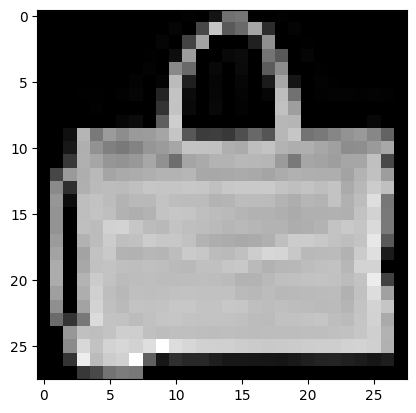

In [294]:
plt.imshow(image.squeeze(), cmap="gray")

In [295]:
rand_image_tensor = torch.randn(size = (1,28,28))
rand_image_tensor.shape


torch.Size([1, 28, 28])

### 7.3 Setup a loss function and optimizer for `model_2`

In [296]:
# setup loss function and optimizer
from helper_functions import accuracy_fn


loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

In [297]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

### 7.4 Training and testing `model_2` using our training and testing functions

In [298]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer() # save start time

# Train and test model_2
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----")
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)
  
# Measure train time
train_time_end_model_2 = timer() # save end time
total_train_time_model_2 = print_train_time(start = train_time_start_model_2,
                                            end = train_time_end_model_2,
                                            device = device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----


Train loss: 0.58791 | Train acc: 78.63%


 33%|███▎      | 1/3 [01:28<02:56, 88.24s/it]

Test loss: 0.41568 | Test acc: 85.40%
Epoch: 1
-----
Train loss: 0.36444 | Train acc: 86.77%


 67%|██████▋   | 2/3 [02:53<01:26, 86.38s/it]

Test loss: 0.34601 | Test acc: 87.15%
Epoch: 2
-----
Train loss: 0.32567 | Train acc: 88.14%


100%|██████████| 3/3 [03:58<00:00, 79.52s/it]

Test loss: 0.32380 | Test acc: 88.13%
Train time on cpu: 238.560 seconds


In [299]:
model_2_results = eval_model(model=model_2,
                              data_loader=test_dataloader,
                              loss_fn=loss_fn,
                              accuracy_fn=accuracy_fn)
model_2_results

100%|██████████| 313/313 [00:05<00:00, 56.66it/s]


{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3237966001033783,
 'model_acc': 88.12899361022365}

## 8. Compare model results and training time

In [320]:
import pandas as pd 
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.323797,88.128994


In [321]:
# Add training time to result comparison
compare_results["training_time"] = [total_train_time_model_0,
                                 total_train_time_model_1,
                                 total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,89.797148
1,FashionMNISTModelV1,0.685001,75.019968,90.426172
2,FashionMNISTModelV2,0.323797,88.128994,238.560384


In [322]:
print(compare_results.model_name)


0    FashionMNISTModelV0
1    FashionMNISTModelV1
2    FashionMNISTModelV2
Name: model_name, dtype: object


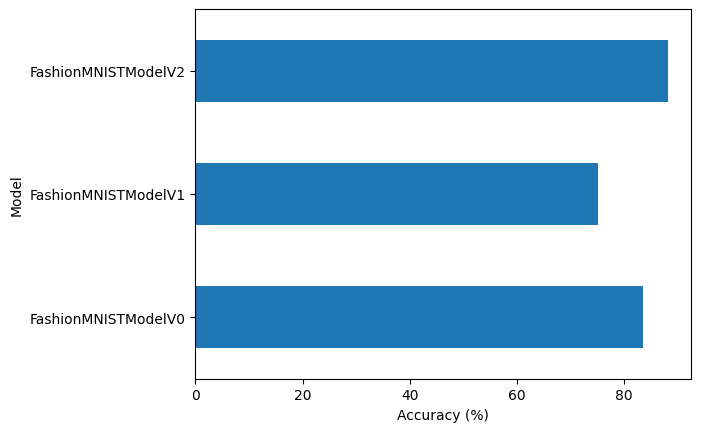

In [323]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("Accuracy (%)")
plt.ylabel("Model");

## 9. Make and evaluate random predictions with best model

In [324]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # prepare the sample (add a batch dimension and send to target device)
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # forward pass
      pred_logits = model(sample)

      # get the prediction probabilities
      pred_prob = torch.softmax(pred_logits.squeeze(), dim=0)

      # get pred_prob off the GPU for further processing
      pred_probs.append(pred_prob.cpu())

  # stack the pred_prbs to turn list into tensor
  return torch.stack(pred_probs) 

In [339]:
import random
#random.seed(42)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# view the first sample shape
test_samples[0].shape


torch.Size([1, 28, 28])

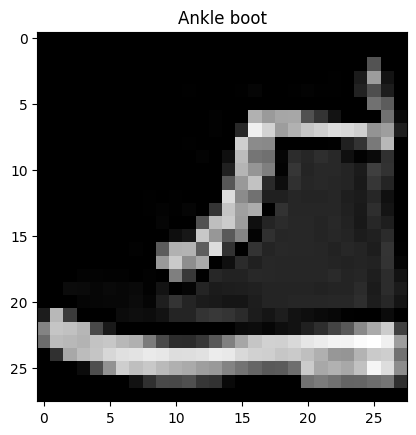

In [340]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]]);

In [341]:
# make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples,
                              device=device)
# view the first two prediction probabilities
pred_probs[:2]


tensor([[4.2528e-06, 9.1191e-07, 9.9579e-07, 1.3787e-05, 4.2762e-07, 2.6028e-03,
         5.8270e-06, 2.1991e-03, 1.5751e-02, 9.7942e-01],
        [4.1601e-05, 2.0156e-06, 1.4815e-05, 3.4370e-06, 1.9819e-06, 8.1536e-04,
         1.0415e-05, 9.5846e-01, 1.3859e-03, 3.9266e-02]])

In [342]:
# convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([9, 7, 2, 0, 1, 0, 3, 5, 4])

In [343]:
test_labels

[9, 7, 2, 0, 1, 0, 4, 5, 4]

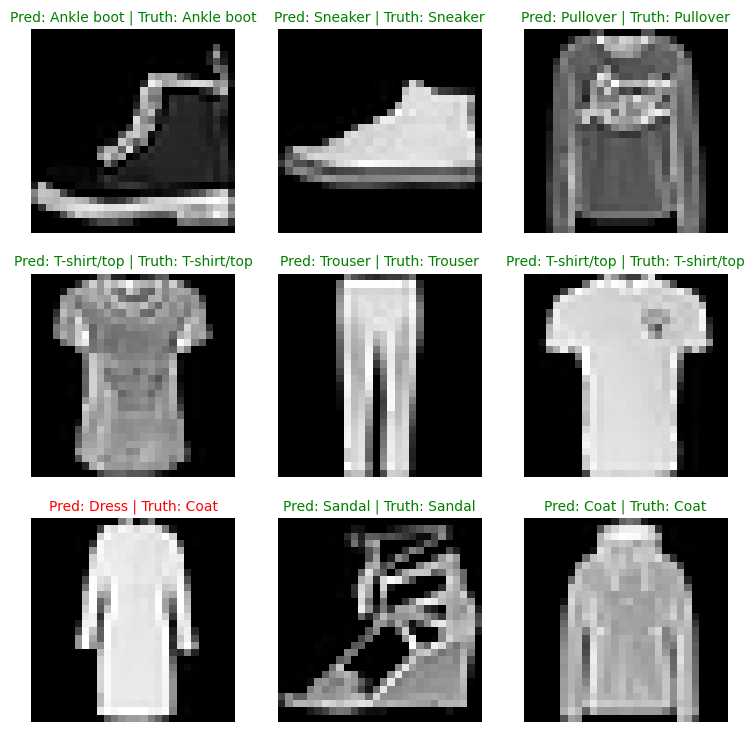

In [346]:
# plot predictions
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # create subplot
  plt.subplot(nrows,ncols, i+1)

  # plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # find the prediction (in test form, eg "Sandel")
  pred_label = class_names[pred_classes[i]]

  # get the truth label (in text form)
  truth_label = class_names[test_labels[i]]

  # create a title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # check for equality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10,color="g") #green if prediction same as truth
  else:
    plt.title(title_text, fontsize=10,color="r")  
  plt.axis(False)


## 10. Making a confusion matrix for further prediction evaluation

1. Make predictions with our trained model on the test dataset
2. Make a confusion matrix `torchmetrics.ConfusionMatrix`
3. Plot the confusion matrix using  `mlxtent.plotting.plot_confusion_matrix()`

In [354]:
from tqdm.auto import tqdm

# 1. make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions..."):
    # Send the data and the targets to the target device
    X, y = X.to(device), y.to(device)

    # do the forward pass
    y_logits=model_2(X)

    # turn predictions from log probs to probs
    y_pred = torch.softmax(y_logits.squeeze(), dim=0).argmax(dim=1)

    # putpredictions on CPU for evaluation
    y_preds.append(y_pred.cpu())


# concatenate list of predictions into a tensor
#print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]


Making predictions...: 100%|██████████| 313/313 [00:07<00:00, 42.29it/s]


tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [355]:
len(y_pred_tensor)

10000

In [357]:
# See if required packages are insatalled and if not, install them...
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1])>=19, "mlxtend version should be 0.19 or higher"
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")


mlxtend version: 0.23.1


In [358]:
import mlxtend

In [359]:
mlxtend.__version__

'0.23.1'

In [360]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

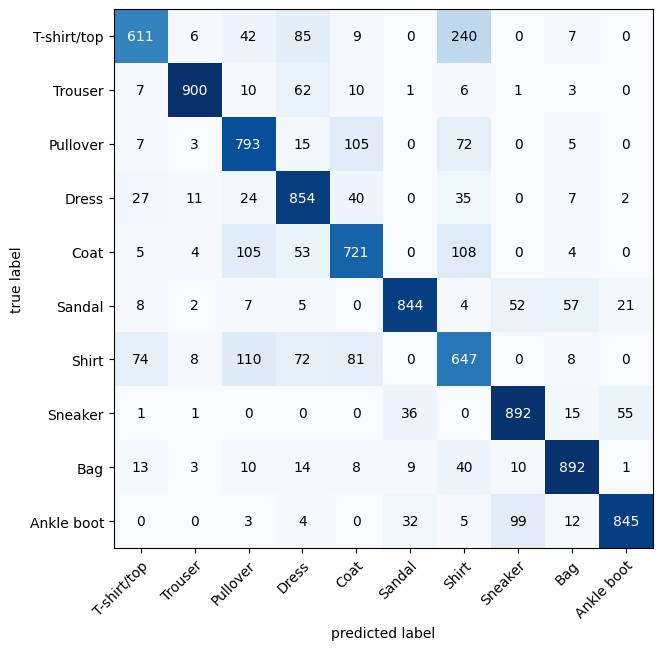

In [370]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task="multiclass")
confmat_tensor = confmat(preds=y_pred_tensor,
                         target = test_data.targets)

# 3. plot the confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(), # matplot lib expects numpy arrays
                                class_names=class_names,
                                figsize=(10,7))